In [1]:
import sys
import os
import numpy as np

# add project root to sys.path so we can import other modules
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
# change working dir to root so we can access relative imports
os.chdir('..')

What we want to do:
- import all images
- make training and testing images
- grab 1 test image, 
- test the model on this one image. in the testing function we can:
-   plot the image
-   turn img into tiles
-   plot each tile: the ones that are accepted and rejected
-   report each tile probability
- report the final classification: was it correct, or incorrect?


In [3]:
from src.data_loader import get_images

image_list, labels = get_images()
len(image_list)

Images loaded


56

In [4]:
from src.split_data import split_data_train_test

_, X_test, _, y_test = split_data_train_test(image_list, labels)

X_train has length: 44
y_train has length: 44
X_test has length: 12
y_test has length: 12


In [5]:
y_test

[1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

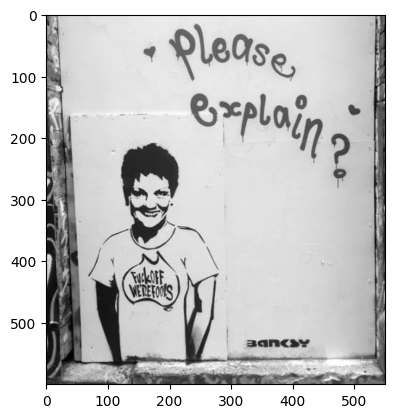

In [6]:
import matplotlib.pyplot as plt

# TODO: also try test_img = X_test[1]: a better entropy example???
test_img = X_test[11]

plt.imshow(test_img, cmap='gray')

In [7]:
from src.get_entropy import get_img_entropy

img_entropy = get_img_entropy(test_img)
img_entropy

np.float64(6.71126926689652)

In [8]:
from src.image_tiler import make_img_tiles

h, w, = 200, 200
overlap = .5
tiles = make_img_tiles(test_img, h, w, overlap)
len(tiles)

18

In [ ]:
# get the entropy of each tile:
tile_entropy = np.array([get_img_entropy(tile) for tile in tiles])
accepted_tiles = tile_entropy >= (img_entropy - 2)
np.sum(accepted_tiles)

np.int64(16)

In [10]:
accepted_tiles

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True])

In [11]:
tile_entropy

array([5.55466745, 5.23513072, 5.51401786, 5.71315919, 6.26764444,
       6.26764444, 6.69685231, 6.01558204, 3.82419248, 4.66651949,
       6.07722028, 6.07722028, 7.31479172, 7.31479172, 5.93607711,
       5.93607711, 6.61753175, 6.61753175])

In [15]:
# for tile in tiles:
#     plt.figure()
#     plt.imshow(tile, cmap='gray')

In [13]:
from src.evaluate import evaluate_on_test_set

model_path = 'models/saved/cnn_200x200_overlap0.5_entropy2.0_3layer_fold4.keras'
test_metrics, image_predictions, image_true_labels, tile_predictions = evaluate_on_test_set([test_img], [1], hyperparams=None, model_path=model_path, model=None)

2025-07-25 15:45:54.796480: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-07-25 15:45:54.796521: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-25 15:45:54.796527: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1753483554.796798 7521640 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1753483554.797199 7521640 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/ME/CODING/banksy_cnn/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variabl

Model loaded successfully from models/saved/cnn_200x200_overlap0.5_entropy2.0_3layer_fold4.keras

Evaluating on test set...

Test Set Results (Image-level):
classification-threshold: 0.4
img_accuracy: 1.0000
img_f1: 1.0000
img_precision: 1.0000
img_recall: 1.0000


In [16]:
tile_predictions

[np.float16(0.6807),
 np.float16(0.581),
 np.float16(0.472),
 np.float16(0.574),
 np.float16(0.5864),
 np.float16(0.5864),
 np.float16(0.485),
 np.float16(0.614),
 np.float16(0.6406),
 np.float16(0.6406),
 np.float16(0.471),
 np.float16(0.471),
 np.float16(0.4756),
 np.float16(0.4756),
 np.float16(0.5654),
 np.float16(0.5654)]

In [45]:
len([n for n in tile_predictions if n >= .5])

13